In [17]:
import numpy as np
import scqubits as sq
import matplotlib.pyplot as plt

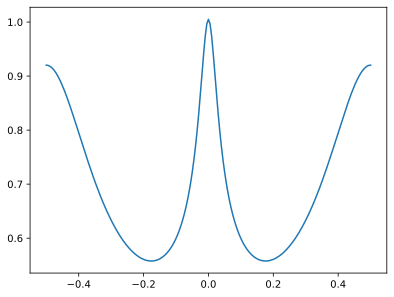

In [70]:
fluxonium = sq.Fluxonium(
    EJ=5.0315,
    EC=3.1220,
    EL=0.14348,
    flux=0,
    cutoff=100,
)

omega_1 = 4.056

flux_array = np.linspace(-0.5, 0.5, 201)
matelements_vs_paramvals = fluxonium.get_matelements_vs_paramvals(
    operator='phi_operator',
    param_name='flux',
    param_vals=flux_array,
    evals_count=6,
    )

energy_table = matelements_vs_paramvals.energy_table
matrixelem_table = matelements_vs_paramvals.matrixelem_table
e_10 = energy_table[:, 1] - energy_table[:, 0]
e_21 = energy_table[:, 2] - energy_table[:, 1]
e_20 = energy_table[:, 2] - energy_table[:, 0]

Delta_110 = e_10 - omega_1
Delta_121 = e_21 - omega_1
Delta_120 = e_20 - omega_1
Delta_101 = -e_10 - omega_1
Delta_112 = -e_21 - omega_1
Delta_102 = -e_20 - omega_1
gj = 1
g_110 = gj * matrixelem_table[:, 1, 0]
g_121 = gj * matrixelem_table[:, 2, 1]
g_120 = gj * matrixelem_table[:, 2, 0]

chi_110 = g_110**2 / Delta_110
chi_121 = g_121**2 / Delta_121
chi_120 = g_120**2 / Delta_120
chi_101 = g_110**2 / Delta_101
chi_112 = g_121**2 / Delta_112
chi_102 = g_120**2 / Delta_102

n1 = 1

ac_startk = np.abs(n1 * (chi_110 - chi_101))

fig, ax = plt.subplots(1,1)
ax.plot(flux_array, ac_startk)
plt.show()

In [44]:

matelements_vs_paramvals.energy_table[:,0]

array([-3.24290471e-01, -3.24235823e-01, -3.24071889e-01, -3.23798702e-01,
       -3.23416318e-01, -3.22924812e-01, -3.22324283e-01, -3.21614852e-01,
       -3.20796664e-01, -3.19869885e-01, -3.18834705e-01, -3.17691339e-01,
       -3.16440025e-01, -3.15081027e-01, -3.13614632e-01, -3.12041155e-01,
       -3.10360939e-01, -3.08574351e-01, -3.06681790e-01, -3.04683682e-01,
       -3.02580484e-01, -3.00372685e-01, -2.98060805e-01, -2.95645400e-01,
       -2.93127058e-01, -2.90506407e-01, -2.87784110e-01, -2.84960872e-01,
       -2.82037437e-01, -2.79014595e-01, -2.75893180e-01, -2.72674072e-01,
       -2.69358204e-01, -2.65946557e-01, -2.62440172e-01, -2.58840143e-01,
       -2.55147626e-01, -2.51363841e-01, -2.47490076e-01, -2.43527688e-01,
       -2.39478109e-01, -2.35342850e-01, -2.31123504e-01, -2.26821751e-01,
       -2.22439366e-01, -2.17978217e-01, -2.13440278e-01, -2.08827633e-01,
       -2.04142477e-01, -1.99387129e-01, -1.94564037e-01, -1.89675784e-01,
       -1.84725097e-01, -

Spectral data:   0%|          | 0/201 [00:00<?, ?it/s]

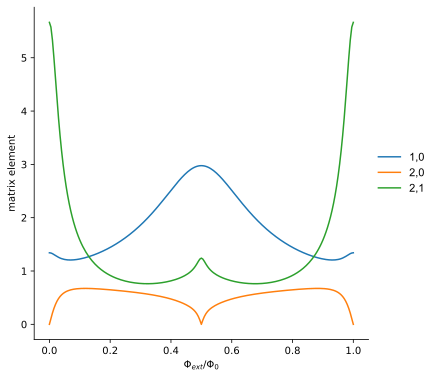

In [41]:
fig , ax = plt.subplots(1, 1, figsize=(6, 6))
fluxonium.plot_matelem_vs_paramvals(
    operator='phi_operator',
    param_name='flux',
    param_vals=flux_array,
    select_elems=[(1,0), (2,0), (2,1)],
    fig_ax=(fig, ax),
)
plt.show()

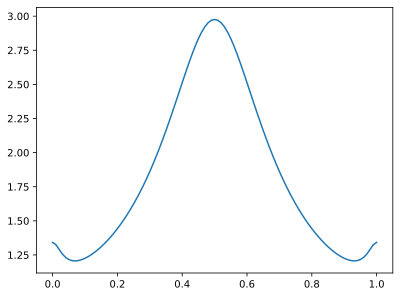

In [31]:
fig, ax = plt.subplots(1,1)
ax.plot(flux_array, np.abs(matelements_vs_paramvals.matrixelem_table[:, 1, 0]), label='(1,0)')
plt.show()

In [15]:
matelements_vs_paramvals.matrixelem_table.shape

(101, 6, 6)

In [16]:
matelements_vs_paramvals.energy_table.shape

(101, 6)